In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 40)

In [2]:
data = pd.read_csv('data/data_2016.csv')

# drop unused columns
data = data.drop(columns = ["demsen16","repsen16","othersen16",
                            "demgov16","repgov16","othergov16","repgov14","demgov14","othergov14"])

In [3]:
data

,state,county,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demhouse16,rephouse16,otherhouse16,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc
0,Alabama,Autauga,1001,18172,5936,865,17379,6363,190,7544.0,14315.0,2258.0,55049.0,40690.0,75.683482,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0
1,Alabama,Baldwin,1003,72883,18458,3874,66016,18424,898,0.0,76995.0,1991.0,199510.0,151770.0,83.178788,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0
2,Alabama,Barbour,1005,5454,4871,144,5550,5912,47,5297.0,4286.0,463.0,26614.0,20375.0,45.885624,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0
3,Alabama,Bibb,1007,6738,1874,207,6132,2202,86,1971.0,6670.0,15.0,22572.0,17590.0,74.765196,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0
4,Alabama,Blount,1009,22859,2156,573,20757,2970,279,2390.0,22367.0,47.0,57704.0,42430.0,87.657701,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,Wyoming,Sweetwater,56037,12154,3231,1745,11428,4774,693,6536.0,9234.0,1539.0,44812.0,30565.0,79.815674,0.865840,15.859591,20.184326,5.509685,47.824244,44.153352,9.417120,68233.0,5.072255,9.314606,78.628507,6.238463,76.606813,10.916313,5.0
3110,Wyoming,Teton,56039,3921,7314,1392,4858,6213,393,7417.0,4389.0,989.0,22623.0,16335.0,81.200548,0.614419,15.174822,18.799452,11.475048,48.097069,35.569995,11.837510,75594.0,2.123447,4.633570,46.211584,1.526877,41.769504,46.430920,7.0
3111,Wyoming,Uinta,56041,6154,1202,1114,6615,1628,296,1826.0,5686.0,1058.0,20893.0,14355.0,87.718375,0.186665,8.959939,12.281625,3.986981,49.327526,43.205858,10.678218,53323.0,6.390755,10.361224,81.793082,8.806312,81.080852,43.095937,7.0
3112,Wyoming,Washakie,56043,2911,532,371,3014,794,136,799.0,2733.0,333.0,8351.0,6135.0,82.397318,0.790325,13.962400,17.602682,3.783978,51.359119,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,10.299738,75.980688,35.954529,7.0


In [4]:
# convert to pct
data['total_pres'] = data['trump16'] + data['clinton16'] + data['otherpres16']
data['total_house'] = data['demhouse16'] + data['rephouse16'] + data['otherhouse16']
data['total_pres_12'] = data['obama12'] + data['romney12'] + data['otherpres12']
data['trump16'] = data['trump16'] / data['total_pres']
data['clinton16'] = data['clinton16'] / data['total_pres']
data['obama12'] = data['obama12'] / data['total_pres_12']
data['romney12'] = data['romney12'] / data['total_pres_12']
data['demhouse16'] = data['demhouse16'] / data['total_house']
data['rephouse16'] = data['rephouse16'] / data['total_house']
data['trump_romney'] = data['trump16'] - data['romney12']
data['clinton_obama'] = data['clinton16'] - data['obama12']

# adding turnout variable
data['turnout'] = data['total_pres'] / data['cvap']

data = data.drop(columns = ['otherhouse16', 'otherpres16', 'total_pres', 'total_house', 'otherpres12'])
data.head()

,state,county,fips,trump16,clinton16,romney12,obama12,demhouse16,rephouse16,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,total_pres_12,trump_romney,clinton_obama,turnout
0,Alabama,Autauga,1001,0.727666,0.237697,0.726183,0.265878,0.312808,0.593565,55049.0,40690.0,75.683482,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0,23932,0.001483,-0.028182,0.613738
1,Alabama,Baldwin,1003,0.765457,0.193856,0.773583,0.215894,0.000000,0.974793,199510.0,151770.0,83.178788,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0,85338,-0.008126,-0.022038,0.627364
2,Alabama,Barbour,1005,0.520967,0.465278,0.482231,0.513685,0.527275,0.426637,26614.0,20375.0,45.885624,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0,11509,0.038735,-0.048407,0.513816
3,Alabama,Bibb,1007,0.764032,0.212496,0.728266,0.261520,0.227703,0.770564,22572.0,17590.0,74.765196,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0,8420,0.035766,-0.049024,0.501364
4,Alabama,Blount,1009,0.893348,0.084258,0.864659,0.123719,0.096355,0.901750,57704.0,42430.0,87.657701,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0,24006,0.028690,-0.039461,0.603064


In [5]:
#quantifying split = (pres_pct - sen_pct)
data['trump_diff'] = (data['trump16'] - data['rephouse16']) * 100
data['clinton_diff'] = (data['clinton16'] - data['demhouse16']) * 100
data.head()

,state,county,fips,trump16,clinton16,romney12,obama12,demhouse16,rephouse16,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,total_pres_12,trump_romney,clinton_obama,turnout,trump_diff,clinton_diff
0,Alabama,Autauga,1001,0.727666,0.237697,0.726183,0.265878,0.312808,0.593565,55049.0,40690.0,75.683482,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0,23932,0.001483,-0.028182,0.613738,13.410117,-7.511168
1,Alabama,Baldwin,1003,0.765457,0.193856,0.773583,0.215894,0.000000,0.974793,199510.0,151770.0,83.178788,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0,85338,-0.008126,-0.022038,0.627364,-20.933588,19.385601
2,Alabama,Barbour,1005,0.520967,0.465278,0.482231,0.513685,0.527275,0.426637,26614.0,20375.0,45.885624,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0,11509,0.038735,-0.048407,0.513816,9.432920,-6.199610
3,Alabama,Bibb,1007,0.764032,0.212496,0.728266,0.261520,0.227703,0.770564,22572.0,17590.0,74.765196,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0,8420,0.035766,-0.049024,0.501364,-0.653157,-1.520758
4,Alabama,Blount,1009,0.893348,0.084258,0.864659,0.123719,0.096355,0.901750,57704.0,42430.0,87.657701,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0,24006,0.028690,-0.039461,0.603064,-0.840127,-1.209718


In [6]:
# defining vote-splitting as average absolute % difference between parties' presidential vote and their house vote
# --> (abs(R_pres_pct - R_house_pct) + abs(D_pres_pct - D_house_pct)) / 2
data['split_index'] = abs(data['trump_diff']) + abs(data['clinton_diff']) / 2
data

,state,county,fips,trump16,clinton16,romney12,obama12,demhouse16,rephouse16,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,total_pres_12,trump_romney,clinton_obama,turnout,trump_diff,clinton_diff,split_index
0,Alabama,Autauga,1001,0.727666,0.237697,0.726183,0.265878,0.312808,0.593565,55049.0,40690.0,75.683482,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0,23932,0.001483,-0.028182,0.613738,13.410117,-7.511168,17.165701
1,Alabama,Baldwin,1003,0.765457,0.193856,0.773583,0.215894,0.000000,0.974793,199510.0,151770.0,83.178788,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0,85338,-0.008126,-0.022038,0.627364,-20.933588,19.385601,30.626388
2,Alabama,Barbour,1005,0.520967,0.465278,0.482231,0.513685,0.527275,0.426637,26614.0,20375.0,45.885624,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0,11509,0.038735,-0.048407,0.513816,9.432920,-6.199610,12.532724
3,Alabama,Bibb,1007,0.764032,0.212496,0.728266,0.261520,0.227703,0.770564,22572.0,17590.0,74.765196,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0,8420,0.035766,-0.049024,0.501364,-0.653157,-1.520758,1.413536
4,Alabama,Blount,1009,0.893348,0.084258,0.864659,0.123719,0.096355,0.901750,57704.0,42430.0,87.657701,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0,24006,0.028690,-0.039461,0.603064,-0.840127,-1.209718,1.444986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,Wyoming,Sweetwater,56037,0.709515,0.188616,0.676413,0.282569,0.377607,0.533480,44812.0,30565.0,79.815674,0.865840,15.859591,20.184326,5.509685,47.824244,44.153352,9.417120,68233.0,5.072255,9.314606,78.628507,6.238463,76.606813,10.916313,5.0,16895,0.033102,-0.093952,0.560445,17.603578,-18.899056,27.053106
3110,Wyoming,Teton,56039,0.310525,0.579235,0.423761,0.541957,0.579680,0.343025,22623.0,16335.0,81.200548,0.614419,15.174822,18.799452,11.475048,48.097069,35.569995,11.837510,75594.0,2.123447,4.633570,46.211584,1.526877,41.769504,46.430920,7.0,11464,-0.113236,0.037278,0.773003,-3.249955,-0.044459,3.272185
3111,Wyoming,Uinta,56041,0.726564,0.141913,0.774681,0.190655,0.213069,0.663477,20893.0,14355.0,87.718375,0.186665,8.959939,12.281625,3.986981,49.327526,43.205858,10.678218,53323.0,6.390755,10.361224,81.793082,8.806312,81.080852,43.095937,7.0,8539,-0.048117,-0.048742,0.590038,6.308710,-7.115621,9.866520
3112,Wyoming,Washakie,56043,0.763241,0.139486,0.764199,0.201318,0.206727,0.707115,8351.0,6135.0,82.397318,0.790325,13.962400,17.602682,3.783978,51.359119,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,10.299738,75.980688,35.954529,7.0,3944,-0.000958,-0.061832,0.621679,5.612556,-6.724093,8.974602


In [7]:
# join with FIPS codes for Highcharts
fips = pd.read_csv('data/fips.csv', encoding='cp1252')[['fips', 'state_abbr', 'long_name']]
fips
data = data.merge(fips, on='fips', how='left').drop(1799).reset_index(drop = True)
data['name'] = data['long_name'].apply(lambda x : (x[:-3] + ',' + x[-3:]))

code_list = []
for idx in data.index:
    code_list.append('us-' + data.iloc[idx]['state_abbr'].lower() + '-' + str(data.iloc[idx]['fips'])[-3:])
code_list
data['code'] = code_list
data = data.drop(columns = ['long_name', 'state_abbr'])
data.head()

,state,county,fips,trump16,clinton16,romney12,obama12,demhouse16,rephouse16,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,total_pres_12,trump_romney,clinton_obama,turnout,trump_diff,clinton_diff,split_index,name,code
0,Alabama,Autauga,1001,0.727666,0.237697,0.726183,0.265878,0.312808,0.593565,55049.0,40690.0,75.683482,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0,23932,0.001483,-0.028182,0.613738,13.410117,-7.511168,17.165701,"Autauga County, AL",us-al-001
1,Alabama,Baldwin,1003,0.765457,0.193856,0.773583,0.215894,0.000000,0.974793,199510.0,151770.0,83.178788,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0,85338,-0.008126,-0.022038,0.627364,-20.933588,19.385601,30.626388,"Baldwin County, AL",us-al-003
2,Alabama,Barbour,1005,0.520967,0.465278,0.482231,0.513685,0.527275,0.426637,26614.0,20375.0,45.885624,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0,11509,0.038735,-0.048407,0.513816,9.432920,-6.199610,12.532724,"Barbour County, AL",us-al-005
3,Alabama,Bibb,1007,0.764032,0.212496,0.728266,0.261520,0.227703,0.770564,22572.0,17590.0,74.765196,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0,8420,0.035766,-0.049024,0.501364,-0.653157,-1.520758,1.413536,"Bibb County, AL",us-al-007
4,Alabama,Blount,1009,0.893348,0.084258,0.864659,0.123719,0.096355,0.901750,57704.0,42430.0,87.657701,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0,24006,0.028690,-0.039461,0.603064,-0.840127,-1.209718,1.444986,"Blount County, AL",us-al-009


In [8]:
# data.to_json('data/data.json', orient = 'records')
# data.to_csv('data/data.csv', index = False)

In [9]:
# data[['code', 'trump_diff']].to_csv('data/trump_diff.csv', index = False)
# data[['code', 'clinton_diff']].to_csv('data/clinton_diff.csv', index = False)

In [10]:
print(max(data['trump_diff']))
print(max(data['clinton_diff']))
print(min(data['trump_diff']))
print(min(data['clinton_diff']))

58.92532778690508
75.44692737430168
-76.45251396648045
-63.95341016187164


In [13]:
trump = data[['state', 'county', 'code', 'trump_diff', 'trump_romney', 'total_population', 'white_pct', 'black_pct', 
              'foreignborn_pct', 'median_hh_inc', 'lesscollege_pct', 'lesscollege_whites_pct', 
              'rural_pct', 'turnout']].copy(deep = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09C81430>,
      dtype=object)

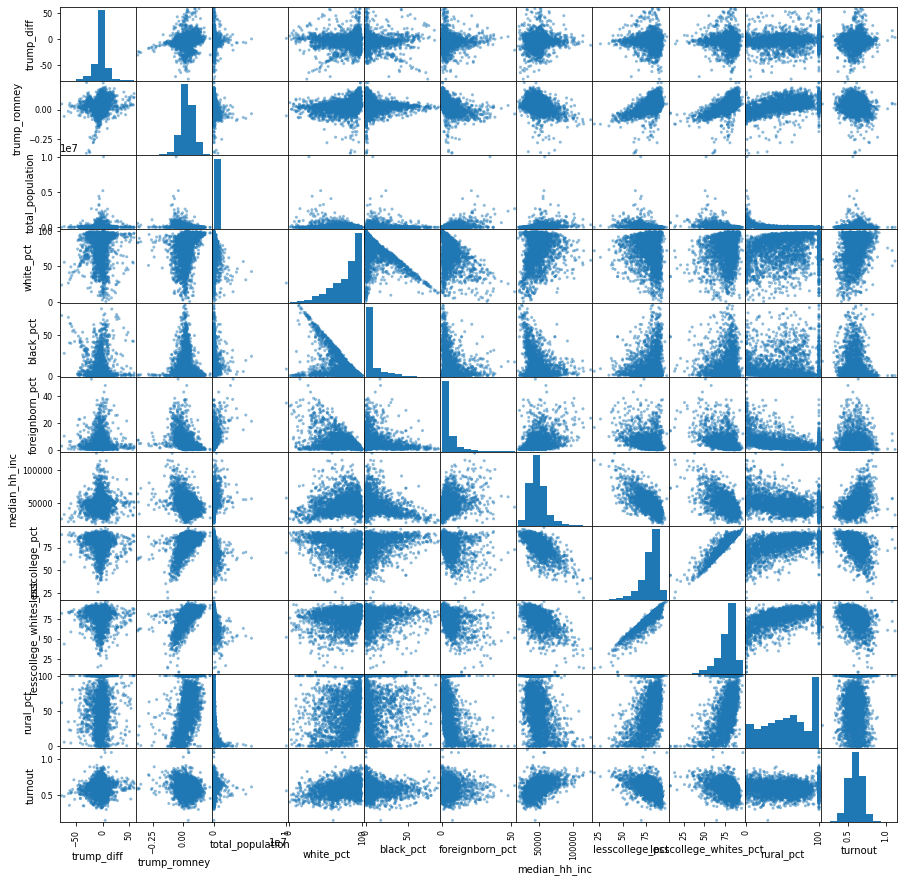

In [14]:
pd.plotting.scatter_matrix(trump, figsize = (15, 15))

In [16]:
data.head()

,state,county,fips,trump16,clinton16,romney12,obama12,demhouse16,rephouse16,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,total_pres_12,trump_romney,clinton_obama,turnout,trump_diff,clinton_diff,split_index,name,code
0,Alabama,Autauga,1001,0.727666,0.237697,0.726183,0.265878,0.312808,0.593565,55049.0,40690.0,75.683482,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0,23932,0.001483,-0.028182,0.613738,13.410117,-7.511168,17.165701,"Autauga County, AL",us-al-001
1,Alabama,Baldwin,1003,0.765457,0.193856,0.773583,0.215894,0.000000,0.974793,199510.0,151770.0,83.178788,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0,85338,-0.008126,-0.022038,0.627364,-20.933588,19.385601,30.626388,"Baldwin County, AL",us-al-003
2,Alabama,Barbour,1005,0.520967,0.465278,0.482231,0.513685,0.527275,0.426637,26614.0,20375.0,45.885624,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0,11509,0.038735,-0.048407,0.513816,9.432920,-6.199610,12.532724,"Barbour County, AL",us-al-005
3,Alabama,Bibb,1007,0.764032,0.212496,0.728266,0.261520,0.227703,0.770564,22572.0,17590.0,74.765196,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0,8420,0.035766,-0.049024,0.501364,-0.653157,-1.520758,1.413536,"Bibb County, AL",us-al-007
4,Alabama,Blount,1009,0.893348,0.084258,0.864659,0.123719,0.096355,0.901750,57704.0,42430.0,87.657701,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0,24006,0.028690,-0.039461,0.603064,-0.840127,-1.209718,1.444986,"Blount County, AL",us-al-009


In [54]:
spider_data = data[['code', 'name', 'total_population', 'white_pct', 
                    'age65andolder_pct', 'rural_pct', 
                    'median_hh_inc', 'lesscollege_pct', 
                   'turnout', 'foreignborn_pct']].copy(deep = True)
spider_data['college_pct'] = 100 - spider_data['lesscollege_pct']
spider_data = spider_data.drop(columns = ['lesscollege_pct'])
spider_data['margin'] = (data['trump16'] - data['clinton16']) * 100

# turn into percentiles
for col in spider_data.columns:
    if col not in ['code', 'name', 'margin']:
        spider_data[col] = spider_data[col].rank(pct=True) * 100
spider_data.head()

,code,name,total_population,white_pct,age65andolder_pct,rural_pct,median_hh_inc,turnout,foreignborn_pct,college_pct,margin
0,us-al-001,"Autauga County, AL",70.758355,36.182519,19.183805,32.691073,73.875321,58.065553,37.114396,74.839332,48.996917
1,us-al-003,"Baldwin County, AL",89.556555,47.011568,64.620823,32.883751,68.476864,63.464010,58.226221,85.250643,57.160111
2,us-al-005,"Barbour County, AL",50.546272,9.286632,42.127249,59.441233,9.190231,19.023136,53.470437,15.167095,5.568822
3,us-al-007,"Bibb County, AL",45.340617,35.089974,25.482005,60.051381,25.257069,15.745501,26.253213,11.182519,55.153646
4,us-al-009,"Blount County, AL",71.625964,57.230077,49.035990,76.140013,49.823265,53.502571,66.902314,16.356041,80.909020


In [55]:
spider_dict = {}
for idx in range(len(spider_data)):
    row = spider_data.iloc[idx]
    out_dict = {
        'code' : row['code'],
        'name' : row['name'],
        'margin' : row['margin'],
        'data' : [
            row['total_population'],
            row['white_pct'],
            row['age65andolder_pct'],
            row['rural_pct'],
            row['median_hh_inc'],
            row['turnout'],
            row['foreignborn_pct'],
            row['college_pct']
        ]
    }
    spider_dict[row['code']] = out_dict

In [56]:
import json
with open('data/spider_dict.json', 'w') as outfile:
    json.dump(spider_dict, outfile)

In [48]:
# spider_dict

{'us-al-001': {'code': 'us-al-001',
  'name': 'Autauga County, AL',
  'margin': 0.48996916670003604,
  'data': [55049.0,
   75.6834819887736,
   13.978455557775801,
   42.0021623206465,
   53099.0,
   0.613738019169329,
   1.83836218641574,
   24.5927713486535]},
 'us-al-003': {'code': 'us-al-003',
  'name': 'Baldwin County, AL',
  'margin': 0.571601113269968,
  'data': [199510.0,
   83.17878803067521,
   18.714851385895397,
   42.2790991139275,
   51365.0,
   0.6273637741319101,
   3.2695103002355803,
   29.54711102853959]},
 'us-al-005': {'code': 'us-al-005',
  'name': 'Barbour County, AL',
  'margin': 0.055688222370809004,
  'data': [26614.0,
   45.88562410761249,
   16.5288945667694,
   67.7896347015333,
   33956.0,
   0.5138159509202453,
   2.8593973096866296,
   12.8677870234405]},
 'us-al-007': {'code': 'us-al-007',
  'name': 'Bibb County, AL',
  'margin': 0.5515364553804286,
  'data': [22572.0,
   74.7651958178274,
   14.8856990962254,
   68.3526074623609,
   39776.0,
   0.5013